# **DataChallenge - Bevindo**

## Contexto

La Gerencia General de Benvindo, una empresa de e-commerce, desea conocer más sobre sus operaciones comerciales, productos y clientes, para poder tomar decisiones con respecto a sus líneas de productos y optimizar sus inventarios seleccionando la mejor su oferta al público.

### Datos

La compañia suministra los siguientes 5 archivos en formato .csv con el esquema de datos:

- olist_order_items_dataset.csv
- olist_order_payments_dataset.csv
- olist_order_reviews_dataset.csv
- olist_orders_dataset.csv
- olist_products_dataset.csv

y un archivo .csv adicional con los nombres de productos traducidos al inglés:

- product_category_name_translation.csv

##Preguntas de negocio a resolver

1) ¿Cuáles son las categorías de producto que tienen más ventas?

2) ¿Qué categorías tienen los mayores costos de envíos?

3) ¿Cuál de estas categorías, tomando solamente el costo de envío, tiene mayor margen de ganancia?

4) Creemos que los productos con mejores reviews son los que tienen más ventas. ¿Realmente es así?

5) ¿Cuál es el tipo de pago preferido por los clientes? y ¿Coincide como el tipo de pago con mayor flujo de dinero?

##1. Importando Librerias y archivos .csv

In [ ]:
# Librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Archivos .csv
items = pd.read_csv('/content/drive/MyDrive/DataChallenge - Bevindo/olist_order_items_dataset.csv')
payments = pd.read_csv('/content/drive/MyDrive/DataChallenge - Bevindo/olist_order_payments_dataset.csv')
reviews = pd.read_csv('/content/drive/MyDrive/DataChallenge - Bevindo/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/DataChallenge - Bevindo/olist_orders_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/DataChallenge - Bevindo/olist_products_dataset.csv')
product_cat = pd.read_csv('/content/drive/MyDrive/DataChallenge - Bevindo/product_category_name_translation.csv')

##2. Explorando la data

In [ ]:
items.info()
print('='*60)
payments.info()
print('='*60)
reviews.info()
print('='*60)
orders.info()
print('='*60)
products.info()
print('='*60)
product_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 

#### Valores nulos: reviews, orders y products

* Reviews

In [ ]:
#Valores nulos reviews
reviews.isnull().sum().sort_values(ascending = False)

review_comment_title       87656
review_comment_message     58247
review_id                      0
order_id                       0
review_score                   0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
#Porcentaje de valores nulos
Nulos_comment_title = round(reviews['review_comment_title'].isnull().sum()/len(reviews)*100,2)
print(f'Porcentaje de datos nulos en comment title: {Nulos_comment_title }%')
Nulos_comment_message = round(reviews['review_comment_message'].isnull().sum()/len(reviews)*100,2)
print(f'Porcentaje de datos nulos en comment message: {Nulos_comment_message}%')

Porcentaje de datos nulos en comment title: 88.34%
Porcentaje de datos nulos en comment message: 58.7%


*Observaciones:*
Variables comment_title y comment_message no ofrecen información de relevancia, alrededor del 60% de los usuarios no dejan comentarios en sus compras y más del 88% de quienes lo hacen no lo acampañan de un título.

* Orders

In [ ]:
#Valores nulos orders
orders.isnull().sum().sort_values(ascending = False)

order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_estimated_delivery_date       0
dtype: int64

In [ ]:
#Porcentaje de valor nulos
orders_oDelivered_customer_date = round(orders["order_delivered_customer_date"].isnull().sum()*100/len(orders),2)
print(f'Nulos en delivered_customer_date es: {orders_oDelivered_customer_date}%')
orders_oDelivered_carrier_date = round(orders["order_delivered_carrier_date"].isnull().sum()*100/len(orders),2)
print(f'Nulos en delivered_carrier_date es: {orders_oDelivered_carrier_date}%')
orders_approved_at = round(orders["order_approved_at"].isnull().sum()*100/len(orders),2)
print(f'Nulos en approved_at es: {orders_approved_at}%')

Nulos en delivered_customer_date es: 2.98%
Nulos en delivered_carrier_date es: 1.79%
Nulos en approved_at es: 0.16%


*Observaciones:*

-Falencias en la recopilación de información de recepción y entrega de la mercaderia, coordinar con empresa transportadora.

-Vincular fecha de aprobación del pedido con la fecha en la que se realizó el pago.

* Products

In [ ]:
# Valores nulos products
products.isnull().sum().sort_values(ascending = False)
Porcentaje_de_Nulos = round(products['product_category_name'].isnull().sum()*100/len(products),2)
print(f'Porcentaje de valores nulos:{Porcentaje_de_Nulos}%')

Porcentaje de valores nulos:1.85%


*Observaciones*:

Asignar categoría provisional a productos sin clasificación o que incluye items varios.



In [ ]:
products.product_category_name.nunique()

73

####Correspondencia de etiquetas categorías de productos

* products vs produts_cat

In [ ]:
pc_gral=list(products['product_category_name'].unique())
pc_traslate = list(product_cat['product_category_name'].unique())
No_coincidencias = set(pc_gral) ^ set(pc_traslate)
print(f'Las categorías de producto: {No_coincidencias} NO hacen parte de la lista proporcionada para hacer la traducción al inglés')

Las categorías de producto: {'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos', nan} NO hacen parte de la lista proporcionada para hacer la traducción al inglés


####Ordenes sin registro de pago

In [ ]:
No_registro_pago = set(list(orders.order_id.unique())) ^ set(list(payments.order_id.unique()))
print(f'La orden {No_registro_pago} no presenta registro de pago.')

La orden {'bfbd0f9bdef84302105ad712db648a6c'} no presenta registro de pago.


In [ ]:
#Detalle de orden sin registro de pago
orders[orders['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']
#payments[payments['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']
#items[items['order_id'] == 'bfbd0f9bdef84302105ad712db648a6c']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04 00:00:00


In [ ]:
products[products['product_id'] == '5a6b04657a4c5ee34285d1e4619a96b4']

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9833,5a6b04657a4c5ee34285d1e4619a96b4,beleza_saude,34.0,1036.0,1.0,1000.0,16.0,16.0,16.0


*Observaciones:*
Orden sin registro de pago, revisar intermitencia en recolección de información del sistema de pago.

##3. Selección de variables de interés y unión de datasets

In [ ]:
#items
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [ ]:
df_items = items.loc[:,['order_id', 'product_id', 'price', 'freight_value']]

In [ ]:
#Products & product cat
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [ ]:
#Remplazar valores nulos en product_category_name con 'No category'
products['product_category_name'].fillna('No Category', inplace= True)

In [ ]:
#Creación de lista con categorías faltantes en product_cat
traslate_list = [('pc_gamer','pc_gamer'),('portateis_cozinha_e_preparadores_de_alimentos','portable kitchen food preparers'),('No Category','No Category')]
df_traslate_list = pd.DataFrame(traslate_list, columns=["product_category_name", "product_category_name_english"])
product_cat= product_cat.append(df_traslate_list, ignore_index=True)

<ipython-input-241-3f433a9a96b9>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  product_cat= product_cat.append(df_traslate_list, ignore_index=True)


In [ ]:
from pandas.core.arrays.interval import value_counts
df_products = products.loc[:,['product_id', 'product_category_name']]
#Merge
df_products_cat =df_products.merge(product_cat, how = 'inner', on ='product_category_name')
#Eliminar columna product_category_name
df_products_cat = df_products_cat.drop(columns =['product_category_name'])
#Renombrar categorías
df_products_cat = df_products_cat.rename(columns = {'product_category_name_english' :'product_category_name'})


In [ ]:
#Merge
df = df_items.merge(df_products_cat, how ='inner',on = 'product_id')

In [ ]:
#Payments
payments.columns

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

In [ ]:
#Merge
df_payments = payments.loc[:,['order_id', 'payment_type','payment_installments','payment_value']]
df = df.merge(df_payments, how = 'inner', on = 'order_id')

In [ ]:
#Reviews
reviews.columns

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [ ]:
#Merge dataset con variables de interés consolidado
df_reviews = reviews.loc[:,['order_id', 'review_score']]
df = df.merge(df_reviews, how = 'inner', on = 'order_id')
df.sample()

,order_id,product_id,price,freight_value,product_category_name,payment_type,payment_installments,payment_value,review_score
89836,4de4b5399589ac552a438c88653fa27b,a17923e795430dfd9d8e9d5bf444cee2,999.9,56.02,computers_accessories,credit_card,10,1055.92,5


# Análisis Exploratorio de datos

## 1. ¿Cuáles son las categorías de producto que tienen más ventas?

*La clasificación se realiza conforme a la contribución de cada categoría de producto al total de ventas.  En su orden: health_beauty, watches_gifts, bed_bath_table, sports_leisure y computers_accesories son las categorías que más contribuyen a las ventas de la compañía representando un poco más del 39% del total de ingresos y ordenes pedido efectuadas.*

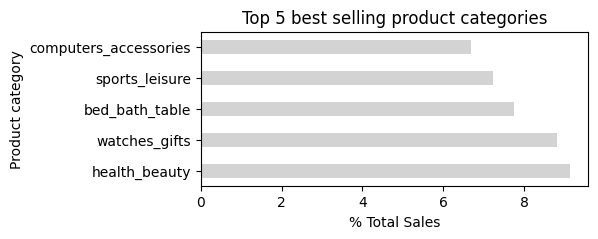

In [ ]:
round(df.groupby('product_category_name')['price'].sum()/df.price.sum() *100,2).sort_values(ascending = False).head().plot(kind ='barh', title = 'Top 5 best selling product categories', color ='lightgrey', ylabel = 'Product category', xlabel = '% Total Sales', width =0.45, legend = False, figsize =(5,2))
plt.show()

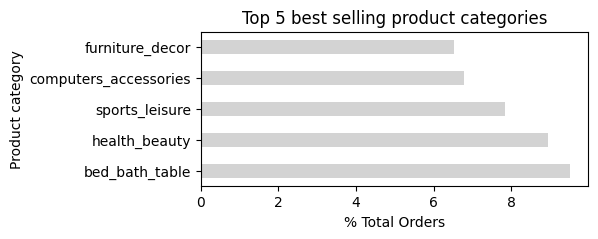

In [ ]:
round(df.groupby('product_category_name')['order_id'].nunique()/df.order_id.nunique() *100,2).sort_values(ascending = False).head().plot(kind ='barh', title = 'Top 5 best selling product categories', color ='lightgrey', ylabel = 'Product category', xlabel = '% Total Orders', width =0.45, legend = False, figsize =(5,2))
plt.show()

##2. ¿Qué categorías tienen los mayores costos de envíos?

*La clasificación se realiza con base en el costo promedio de trasporte por categoría de producto.*

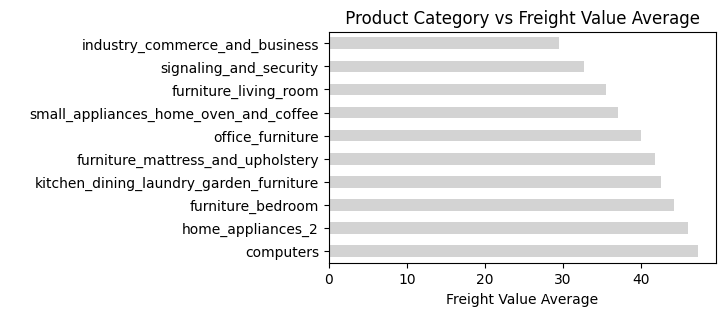

In [ ]:
df[['product_category_name','freight_value']].groupby('product_category_name').mean().sort_values(by = 'freight_value', ascending = False).head(10).plot(kind = 'barh', ylabel =' ',xlabel ='Freight Value Average', color ='lightgrey', figsize =(5,3), legend = False, title =' Product Category vs Freight Value Average ')
plt.show()

## 3. ¿Cuál de estas categorías, tomando solamente el costo de envío, tiene mayor margen de ganancia?

*De acuerdo a la instrucción, se hace la relación de las categorías de producto con mayor promedio de costo de transporte y su costo promedio de venta, para determinar cual de estas genera mayor beneficio.*

*Asi pues, la categoría "furniture_mattress_and_upholstery" con un precio de venta promedio de USD 117.94, tiene un costo de transporte de USD 41.77, que equivale al 35.42% del valor del producto.*


In [ ]:
#Costo de transporte promedio por categoría
df_freight = df[['product_category_name','freight_value']].groupby(by ='product_category_name').mean().sort_values(by ='freight_value', ascending = False).head(10)

In [ ]:
#Costo promedio de producto por categoría
df_price = df[['product_category_name','price']].groupby('product_category_name').mean().sort_values(by='price', ascending = False)

In [ ]:
#Porcentaje del costo del producto que se cobra por concepto de transporte
df_price['pct'] = round((df_freight['freight_value'] /  df_price['price'])*100,2)
df_price['pct'] = df_price['pct'].astype(float)
df_price.sort_values(by='pct', ascending = False).head(1)

,price,pct
product_category_name,,
furniture_mattress_and_upholstery,117.948293,35.42


##4. Creemos que los productos con mejores reviews son los que tienen más ventas. ¿Realmente es así?

*Las ventas de productos con calificaciones de 5 y 4, representan más del 80% del total de ventas. Sin embargo, el tercer lugar en ventas corresponde a pedidos con la calificación baja equivalente al 13.43% del total, seguido por 3 y 2 con un 7.59  y 3.37% del total de ventas.*

*Por otro lado si consideramos las categorías presentes en cada grupo, podemos apreciar que 73 de las 74 categorías de productos que maneja Bevindo, están presentes tanto en las ventas con calificaciones de 4 y 5 como de un punto de satisfacción. Aún así, en relación al total de ordenes efectuadas, podemos establecer que hay correspondecia entre las ventas y el puntaje del review, productos con las mejores calificaciones generan mayores ventas en el comercio.*

In [ ]:
#Puntuaciónpromedio reviews por categoría
#df[['product_category_name','review_score']].groupby('product_category_name').mean().sort_values(by ='review_score', ascending = False).head()

,review_score
product_category_name,
cds_dvds_musicals,4.642857
fashion_childrens_clothes,4.500000
books_general_interest,4.438503
flowers,4.419355
books_imported,4.419355


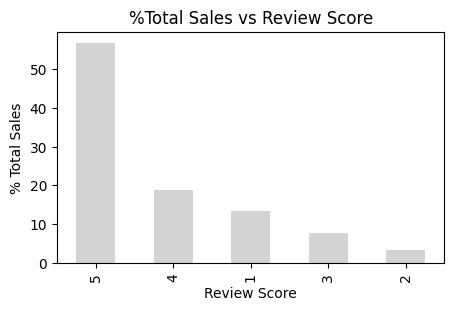

In [ ]:
#Porcentaje ventas por review_score
round(df.groupby('review_score').price.sum() / df.price.sum() *100,2).sort_values(ascending = False).plot(kind ='bar', ylabel ='% Total Sales', xlabel = 'Review Score', color = 'lightgrey', figsize=(5,3), title = '%Total Sales vs Review Score')
plt.show()

In [ ]:
#Categorías de productos presentes en cada grupo - review_score
calificacion_categorias = (
    [df[df['review_score']== 5].product_category_name.nunique(),'5'],
    [df[df['review_score']== 4].product_category_name.nunique(),'4'],
    [df[df['review_score']== 3].product_category_name.nunique(),'3'],
    [df[df['review_score']== 2].product_category_name.nunique(),'2'],
    [df[df['review_score']== 1].product_category_name.nunique(),'1']
)
pd.DataFrame(calificacion_categorias, columns =['No. categories', 'review_score'])

,No. categories,review_score
0,73,5
1,73,4
2,70,3
3,64,2
4,73,1


In [ ]:
#Porcentaje de ordenes vs  categoría de producto y review_score
rev_rev=df[['product_category_name','review_score','order_id']]
rev_df = round(rev_rev.groupby(['product_category_name','review_score'])['order_id'].nunique().unstack() / rev_rev.order_id.nunique() *100,2)
rev_df.style.background_gradient(cmap='Blues')

review_score,1,2,3,4,5
product_category_name,,,,,
No Category,0.240000,0.050000,0.090000,0.290000,0.800000
agro_industry_and_commerce,0.020000,0.010000,0.010000,0.050000,0.090000
air_conditioning,0.030000,0.010000,0.020000,0.050000,0.150000
art,0.030000,0.010000,0.020000,0.040000,0.110000
arts_and_craftmanship,0.000000,nan,0.000000,0.000000,0.020000
audio,0.060000,0.020000,0.030000,0.050000,0.190000
auto,0.450000,0.130000,0.310000,0.820000,2.260000
baby,0.370000,0.100000,0.250000,0.540000,1.670000
bed_bath_table,1.220000,0.390000,0.960000,1.910000,5.090000


##5. ¿Cuál es el tipo de pago preferido por los clientes? y ¿Coincide como el tipo de pago con mayor flujo de dinero?

*El medio de pago con mayor preferencia entre los clientes de Bevindo es la tarjeta de crédito. Con este medio de pago se procesa el 73.73% de las ordenes de pedido y el 77.25% del flujo de dinero de por concepto de ventas de la compañia.*

In [ ]:
df[['payment_type','price']].groupby('payment_type').price.agg(['count', 'sum']).sort_values(by ='payment_type', ascending = True)

,count,sum
payment_type,,
boleto,22835,2378676.05
credit_card,86520,10923361.41
debit_card,1692,183834.27
voucher,6282,655129.59


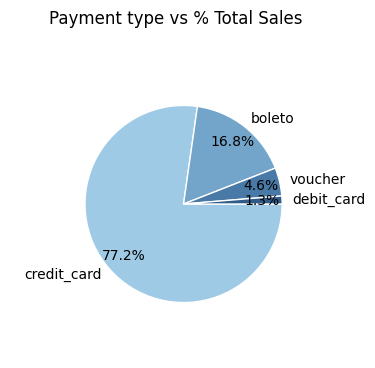

In [ ]:
#Porcentaje de flujo de dinero según medio de pago
round(df.groupby('payment_type').price.sum() / df.price.sum() *100,2).sort_values(ascending= False).plot(kind='pie', subplots = True,legend= False, figsize =(6,4), autopct ='%1.1f%%',pctdistance=0.8, labeldistance=1.1, radius=0.8, ylabel = ' ', colors=["#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"], wedgeprops = {"linewidth": 1, "edgecolor": "white"}, counterclock = False, title ='Payment type vs % Total Sales')
plt.show()

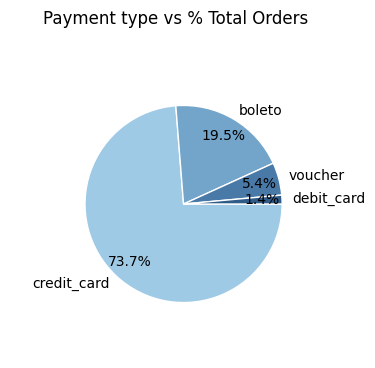

In [ ]:
#Porcentaje de ordenes de compra según medio de pago
round(df.groupby('payment_type').price.count() / df.price.count() *100,2).sort_values(ascending = False).plot(kind='pie', subplots = True,legend= False, figsize =(6,4), autopct ='%1.1f%%',pctdistance=0.8, labeldistance=1.1, radius=0.8, ylabel = ' ', colors=["#9FCAE6", "#73A4CA", "#497AA7", "#2E5B88"], wedgeprops = {"linewidth": 1, "edgecolor": "white"}, counterclock = False, title ='Payment type vs % Total Orders')
plt.show()

*En relación al número de cuotas en que se realizan los pagos, la preferencia recae en 1,2 y 3 cuotas que representan el 49.87, 11.64 y 10% del registro de pagos de las ordenes de pedido.*

In [ ]:
#Cantidad de ordenes de compra agrupadas según cuotas de pago
df[['order_id','payment_installments']].groupby(by ='payment_installments').count().sort_values(by = 'order_id', ascending = False).head(5)

,order_id
payment_installments,
1,58507
2,13656
3,11728
4,7951
10,6841


Cantidad de cuotas seleccionadas para el pago con mayor frecuencia [%]:

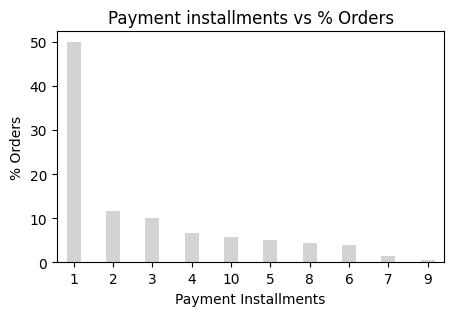

In [ ]:
round((df.groupby('payment_installments').order_id.count() / df.order_id.count() *100),2).sort_values(ascending=False).head(10).plot(kind= 'bar', ylabel ='% Orders', xlabel ='Payment Installments', title = 'Payment installments vs % Orders', width =0.35, color ='lightgrey', figsize =(5,3), rot= True)
plt.show()